In [1]:
import os, sys
from typing import List, Tuple

import hydra
import pyrootutils
from lightning import LightningDataModule, LightningModule, Trainer
from lightning.pytorch.loggers import Logger
from omegaconf import DictConfig
import pytorch_lightning as pl

sys.path.append('/dartfs/rc/lab/F/FinnLab/tommy/isc_asynchrony_behavior/code/modeling/joint-clm-prosody/')

from src import utils

/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/transformers/utils/hub.py:127: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [25]:
BASE_DIR = '/dartfs/rc/lab/F/FinnLab/tommy/isc_asynchrony_behavior/code/modeling/joint-clm-prosody/'
configs_dir = os.path.join(BASE_DIR, 'configs/')

log = utils.get_pylogger(__name__)


# no prosody embeddings
experiment_fn = 'joint_clm_prosody.yaml'
experiment_name = 'scratch-gpt2_clm-loss'

overrides = [
    f"experiment={experiment_fn}",
    f"trainer=default.yaml",
    f'logger.wandb.name={experiment_name}',
    f"model.loss_mode=clm",
    f"model.pretrained=False",
    f"model.use_prosody_embeddings=True",
]

In [36]:
@hydra.main(version_base="1.3",config_path=configs_dir, config_name='train.yaml')
def load_model(cfg: DictConfig) -> pl.LightningModule:
    # Print the config for verification
    print(OmegaConf.to_yaml(cfg))
    
    # Instantiate your model here
    model = hydra.utils.instantiate(cfg.model)
    
    return model

In [42]:
pyrootutils.setup_root(BASE_DIR, indicator=".project-root", pythonpath=True)

@hydra.main(version_base="1.3", config_path=configs_dir, config_name="train.yaml")
def main(cfg: DictConfig):
    # apply extra utilities
    # (e.g. ask for tags if none are provided in cfg, print cfg tree, etc.)
    utils.extras(cfg)

    model = predict(cfg)
    
    return model

# @utils.task_wrapper
def predict(cfg: DictConfig) -> pl.LightningModule:
    
    log.info(f"Instantiating model <{cfg.model._target_}>")
    
    model: LightningModule = hydra.utils.instantiate(
        cfg.model, #save_path=cfg.paths.output_dir
    )

    log.info("Instantiating loggers...")
    logger: List[Logger] = utils.instantiate_loggers(cfg.get("logger"))

    log.info("Instantiating callbacks...")
    callbacks: List[Callback] = utils.instantiate_callbacks(cfg.get("callbacks"))

    log.info(f"Instantiating trainer <{cfg.trainer._target_}>")
    trainer: Trainer = hydra.utils.instantiate(
        cfg.trainer, callbacks=callbacks, logger=logger
    )

    print (logger[0]._checkpoint_name)
    print (f'Best model: {trainer.checkpoint_callback.best_model_path}')
    
    return model

In [26]:
# Clear any command line arguments that Jupyter might have added
sys.argv = [sys.argv[0]]

# Add your Hydra override
sys.argv.extend(overrides)

In [45]:
models_paths = {
    'scratch-gpt2_clm-loss': os.path.join(BASE_DIR, 'logs/train/runs/2024-09-12/08-53-13/checkpoints/epoch_014.ckpt')
}

In [43]:
main()

[2024-09-30 11:33:27,142][src.utils.utils][INFO] - Enforcing tags! <cfg.extras.enforce_tags=True>


['gpt2', 'prominence', 'regression', 'absolute', 'mle']

[2024-09-30 11:33:27,147][src.utils.utils][INFO] - Printing config tree with Rich! <cfg.extras.print_config=True>


CONFIG
├── data
│   └── _target_: src.data.prominence_regression_datamodule.ProminenceRegressionDataModule                         
│       data_dir: /dartfs/rc/lab/F/FinnLab/tommy/isc_asynchrony_behavior/code/modeling/joint-clm-prosody/data//hels
│       train_file: train_360.txt                                                                                  
│       val_file: dev.txt                                                                                          
│       test_file: test.txt                                                                                        
│       batch_size: 64                                                                                             
│       train_val_test_split: null                                                                                 
│       model_name: gpt2                                                                                           
│       use_fast_tokenizer: false                                                                                  
│       score_first_token: false                                                                                   
│       score_last_token: true                                                                                     
│       relative_to_prev: false                                                                                    
│       n_prev: 1                                                                                                  
│       relative_to_mean: false                                                                                    
│       word_stats_path: null                                                                                      
│       num_workers: 8                                                                                             
│       pin_memory: false                                                                                          
│       dataset_name: helsinki_prominence                                                                          
│       debug: false                                                                                               
│                                                                                                                  
├── model
│   └── _target_: src.models.joint_clm_prosody.ProsodyCausalLM                                                     
│       optimizer:                                                                                                 
│         _target_: torch.optim.AdamW                                                                              
│         _partial_: true                                                                                          
│         lr: 2.5e-05                                                                                              
│         weight_decay: 0.1                                                                                        
│       scheduler:                                                                                                 
│         _target_: torch.optim.lr_scheduler.ReduceLROnPlateau                                                     
│         _partial_: true                                                                                          
│         mode: min                                                                                                
│         factor: 0.1                                                                                              
│         patience: 2                                                                                              
│       model_name: gpt2                                                                                           
│       num_labels: 1                                                                                              
│       loss_mode: clm        

CONFIG
├── data
│   └── _target_: src.data.prominence_regression_datamodule.ProminenceRegressionDataModule                         
│       data_dir: /dartfs/rc/lab/F/FinnLab/tommy/isc_asynchrony_behavior/code/modeling/joint-clm-prosody/data//hels
│       train_file: train_360.txt                                                                                  
│       val_file: dev.txt                                                                                          
│       test_file: test.txt                                                                                        
│       batch_size: 64                                                                                             
│       train_val_test_split: null                                                                                 
│       model_name: gpt2                                                                                           
│       use_fast_tokenizer: false                                                                                  
│       score_first_token: false                                                                                   
│       score_last_token: true                                                                                     
│       relative_to_prev: false                                                                                    
│       n_prev: 1                                                                                                  
│       relative_to_mean: false                                                                                    
│       word_stats_path: null                                                                                      
│       num_workers: 8                                                                                             
│       pin_memory: false                                                                                          
│       dataset_name: helsinki_prominence                                                                          
│       debug: false                                                                                               
│                                                                                                                  
├── model
│   └── _target_: src.models.joint_clm_prosody.ProsodyCausalLM                                                     
│       optimizer:                                                                                                 
│         _target_: torch.optim.AdamW                                                                              
│         _partial_: true                                                                                          
│         lr: 2.5e-05                                                                                              
│         weight_decay: 0.1                                                                                        
│       scheduler:                                                                                                 
│         _target_: torch.optim.lr_scheduler.ReduceLROnPlateau                                                     
│         _partial_: true                                                                                          
│         mode: min                                                                                                
│         factor: 0.1                                                                                              
│         patience: 2                                                                                              
│       model_name: gpt2                                                                                           
│       num_labels: 1                                                                                              
│       loss_mode: clm        

[2024-09-30 11:33:27,186][__main__][INFO] - Instantiating model <src.models.joint_clm_prosody.ProsodyCausalLM>
Loading Huggingface model.
Initializing new model
Using clm loss
[2024-09-30 11:33:28,826][__main__][INFO] - Instantiating loggers...
[2024-09-30 11:33:28,826][src.utils.instantiators][INFO] - Instantiating logger <lightning.pytorch.loggers.wandb.WandbLogger>
[2024-09-30 11:33:28,829][__main__][INFO] - Instantiating callbacks...
[2024-09-30 11:33:28,829][src.utils.instantiators][INFO] - Instantiating callback <lightning.pytorch.callbacks.ModelCheckpoint>
[2024-09-30 11:33:28,833][src.utils.instantiators][INFO] - Instantiating callback <lightning.pytorch.callbacks.EarlyStopping>
[2024-09-30 11:33:28,834][src.utils.instantiators][INFO] - Instantiating callback <lightning.pytorch.callbacks.RichModelSummary>
[2024-09-30 11:33:28,835][src.utils.instantiators][INFO] - Instantiating callback <lightning.pytorch.callbacks.RichProgressBar>
[2024-09-30 11:33:28,839][__main__][INFO] - Ins

Using bfloat16 Automatic Mixed Precision (AMP)
Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


None
Best model: 


### Test loading model from checkpoint

In [50]:
from hydra import initialize, compose

with initialize(version_base="1.3", config_path="../modeling/joint-clm-prosody/configs"):
  cfg = compose(config_name="train.yaml", overrides=overrides)

/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'output_activation' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_activation'])`.


Loading Huggingface model.
Initializing new model
Using clm loss


/scratch/ipykernel_3806087/643882370.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(models_paths['scratch-gpt2_clm-loss'], map_location=torch.de

ProsodyCausalLM(
  (model): GPT2LMHeadModel(
    (transformer): GPT2Model(
      (wte): Embedding(50257, 768)
      (wpe): Embedding(1024, 768)
      (drop): Dropout(p=0.1, inplace=False)
      (h): ModuleList(
        (0-11): 12 x GPT2Block(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): GPT2SdpaAttention(
            (c_attn): Conv1D()
            (c_proj): Conv1D()
            (attn_dropout): Dropout(p=0.1, inplace=False)
            (resid_dropout): Dropout(p=0.1, inplace=False)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): GPT2MLP(
            (c_fc): Conv1D()
            (c_proj): Conv1D()
            (act): NewGELUActivation()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
      (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
    (lm_head): Linear(in_features=768, out_features=50257, bias=False)
  )
  (prosody_embed): Linear(in

In [127]:
cfg.data['batch_size'] = 1

datamodule: LightningDataModule = hydra.utils.instantiate(
    cfg.data, model_name=cfg.model.model_name
)

In [128]:
# datamodule.setup(stage="fit")
datamodule.setup(stage="test")

Using GPT2 tokenizer


/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Dataloader: padding with token id: 50256
Loading data from /dartfs/rc/lab/F/FinnLab/tommy/isc_asynchrony_behavior/code/modeling/joint-clm-prosody/data/helsinki-prosody/data


Preprocessing samples: 100%|██████████| 4822/4822 [00:03<00:00, 1215.39it/s]

Failed 325/4822


### Scratch models

In [233]:
models_paths = {
    # model that was trained with prosody embedding
    'scratch-gpt2_clm-loss': 
        {'ckpt_path': os.path.join(BASE_DIR, 'logs/train/runs/2024-09-11/17-06-38/checkpoints/epoch_014.ckpt'),
         'overrides': experiment + [f"model.loss_mode=clm", f"model.pretrained=False", f"model.use_prosody_embeddings=True"]
        },
    
    # same model as previous but removing prosody embedding for inference
    'lesion-gpt2_clm-loss': 
        {'ckpt_path': os.path.join(BASE_DIR, 'logs/train/runs/2024-09-11/17-06-38/checkpoints/epoch_014.ckpt'),
         'overrides': experiment + [f"model.loss_mode=clm", f"model.pretrained=False", f"model.use_prosody_embeddings=False"]
        },

    # same model as previous but removing prosody embedding for inference
    'scratch-gpt2_joint-loss': 
        {'ckpt_path': os.path.join(BASE_DIR, 'logs/train/runs/2024-09-12/07-41-15/checkpoints/epoch_014.ckpt'),
         'overrides': experiment + [f"model.loss_mode=joint", f"model.pretrained=False", f"model.use_prosody_embeddings=True"]
        },

    # same model as previous but removing prosody embedding for inference
    'lesion-gpt2_joint-loss': 
        {'ckpt_path': os.path.join(BASE_DIR, 'logs/train/runs/2024-09-12/07-41-15/checkpoints/epoch_014.ckpt'),
         'overrides': experiment + [f"model.loss_mode=joint", f"model.pretrained=False", f"model.use_prosody_embeddings=False"]
        },
    
    # this is the true one without prosody embedding
    'scratch-gpt2_clm-loss_no-prosody-embed': 
        {'ckpt_path': os.path.join(BASE_DIR, 'logs/train/runs/2024-09-09/16-24-58/checkpoints/epoch_014.ckpt'), 
         'overrides': experiment + [f"model.loss_mode=clm", f"model.pretrained=False", f"model.use_prosody_embeddings=False"]
        }
}

### Fine tuned models

In [234]:
from src.models.joint_clm_prosody import ProsodyCausalLM

experiment = ["experiment=joint_clm_prosody.yaml"]

models_paths = {
    # model that was trained with prosody embedding
    'finetune-gpt2_clm-loss_no-prosody-embed': 
        {'ckpt_path': os.path.join(BASE_DIR, 'logs/train/runs/2024-09-27/16-03-29/checkpoints/epoch_002.ckpt'),
         'overrides': experiment + [f"model.loss_mode=clm", f"model.pretrained=False", f"model.use_prosody_embeddings=False"]
        },
    
    # same model as previous but removing prosody embedding for inference
    'finetune-gpt2_clm-loss': 
        {'ckpt_path': os.path.join(BASE_DIR, 'logs/train/runs/2024-09-27/16-33-07/checkpoints/epoch_002.ckpt'),
         'overrides': experiment + [f"model.loss_mode=clm", f"model.pretrained=False", f"model.use_prosody_embeddings=True"]
        },

    # same model as previous but removing prosody embedding for inference
    'lesion-gpt2_clm-loss': 
        {'ckpt_path': os.path.join(BASE_DIR, 'logs/train/runs/2024-09-27/16-33-07/checkpoints/epoch_002.ckpt'),
         'overrides': experiment + [f"model.loss_mode=clm", f"model.pretrained=False", f"model.use_prosody_embeddings=False"]
        },

    # same model as previous but removing prosody embedding for inference
    'finetune-gpt2_joint-loss': 
        {'ckpt_path': os.path.join(BASE_DIR, 'logs/train/runs/2024-09-27/17-46-06/checkpoints/epoch_006.ckpt'),
         'overrides': experiment + [f"model.loss_mode=joint", f"model.pretrained=False", f"model.use_prosody_embeddings=True"]
        },
    
    # this is the true one without prosody embedding
    'lesion-gpt2_joint-loss': 
        {'ckpt_path': os.path.join(BASE_DIR, 'logs/train/runs/2024-09-27/17-46-06/checkpoints/epoch_006.ckpt'),
         'overrides': experiment + [f"model.loss_mode=joint", f"model.pretrained=False", f"model.use_prosody_embeddings=False"]
        },
}

### Get model accuracies

In [235]:
from hydra import initialize, compose

def load_model(ckpt_path, overrides):
    
    with initialize(version_base="1.3", config_path="../modeling/joint-clm-prosody/configs"):
      cfg = compose(config_name="train.yaml", overrides=overrides)

    model: LightningModule = hydra.utils.instantiate(cfg.model)

    # Load the model from a checkpoint
    checkpoint = torch.load(ckpt_path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()

    return model

def get_model_accuracy(model, dataloader):

    results = []
    
    for i, batch in enumerate(dataloader):
        print (f'Batch {i+1}/{str(len(datamodule.test_dataloader()))}')

        with torch.no_grad():
            outputs = model(batch=batch)

        logits, labels, mask = model.get_shifted_clm_labels(logits=outputs['logits'], labels=batch['input_ids'], mask=batch['attention_mask'])
        accuracy = model.calculate_accuracy(logits, labels, mask)
        
        results.append(accuracy.numpy())
    return results

In [236]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

dataloader = datamodule.test_dataloader()

df_stack = []

for model_name, info in models_paths.items():

    model = load_model(**info)
    accuracy = get_model_accuracy(model, dataloader)
    df = pd.DataFrame(accuracy, columns=['accuracy'])
    df['model'] = model_name

    df_stack.append(df)

df_stack = pd.concat(df_stack).reset_index(drop=True)

/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'output_activation' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_activation'])`.


Loading Huggingface model.
Initializing new model
Using clm loss


/scratch/ipykernel_3806087/3229512904.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=torch.device('cpu'))
huggingface/t

Batch 1/4497
Batch 2/4497
Batch 3/4497
Batch 4/4497
Batch 5/4497
Batch 6/4497
Batch 7/4497
Batch 8/4497
Batch 9/4497
Batch 10/4497
Batch 11/4497
Batch 12/4497
Batch 13/4497
Batch 14/4497
Batch 15/4497
Batch 16/4497
Batch 17/4497
Batch 18/4497
Batch 19/4497
Batch 20/4497
Batch 21/4497
Batch 22/4497
Batch 23/4497
Batch 24/4497
Batch 25/4497
Batch 26/4497
Batch 27/4497
Batch 28/4497
Batch 29/4497
Batch 30/4497
Batch 31/4497
Batch 32/4497
Batch 33/4497
Batch 34/4497
Batch 35/4497
Batch 36/4497
Batch 37/4497
Batch 38/4497
Batch 39/4497
Batch 40/4497
Batch 41/4497
Batch 42/4497
Batch 43/4497
Batch 44/4497
Batch 45/4497
Batch 46/4497
Batch 47/4497
Batch 48/4497
Batch 49/4497
Batch 50/4497
Batch 51/4497
Batch 52/4497
Batch 53/4497
Batch 54/4497
Batch 55/4497
Batch 56/4497
Batch 57/4497
Batch 58/4497
Batch 59/4497
Batch 60/4497
Batch 61/4497
Batch 62/4497
Batch 63/4497
Batch 64/4497
Batch 65/4497
Batch 66/4497
Batch 67/4497
Batch 68/4497
Batch 69/4497
Batch 70/4497
Batch 71/4497
Batch 72/4497
B

/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'output_activation' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_activation'])`.


Loading Huggingface model.
Initializing new model
Using clm loss


/scratch/ipykernel_3806087/3229512904.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=torch.device('cpu'))
huggingface/t

Batch 1/4497
Batch 2/4497
Batch 3/4497
Batch 4/4497
Batch 5/4497
Batch 6/4497
Batch 7/4497
Batch 8/4497
Batch 9/4497
Batch 10/4497
Batch 11/4497
Batch 12/4497
Batch 13/4497
Batch 14/4497
Batch 15/4497
Batch 16/4497
Batch 17/4497
Batch 18/4497
Batch 19/4497
Batch 20/4497
Batch 21/4497
Batch 22/4497
Batch 23/4497
Batch 24/4497
Batch 25/4497
Batch 26/4497
Batch 27/4497
Batch 28/4497
Batch 29/4497
Batch 30/4497
Batch 31/4497
Batch 32/4497
Batch 33/4497
Batch 34/4497
Batch 35/4497
Batch 36/4497
Batch 37/4497
Batch 38/4497
Batch 39/4497
Batch 40/4497
Batch 41/4497
Batch 42/4497
Batch 43/4497
Batch 44/4497
Batch 45/4497
Batch 46/4497
Batch 47/4497
Batch 48/4497
Batch 49/4497
Batch 50/4497
Batch 51/4497
Batch 52/4497
Batch 53/4497
Batch 54/4497
Batch 55/4497
Batch 56/4497
Batch 57/4497
Batch 58/4497
Batch 59/4497
Batch 60/4497
Batch 61/4497
Batch 62/4497
Batch 63/4497
Batch 64/4497
Batch 65/4497
Batch 66/4497
Batch 67/4497
Batch 68/4497
Batch 69/4497
Batch 70/4497
Batch 71/4497
Batch 72/4497
B

/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'output_activation' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_activation'])`.


Loading Huggingface model.
Initializing new model
Using clm loss


/scratch/ipykernel_3806087/3229512904.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=torch.device('cpu'))
huggingface/t

Batch 1/4497
Batch 2/4497
Batch 3/4497
Batch 4/4497
Batch 5/4497
Batch 6/4497
Batch 7/4497
Batch 8/4497
Batch 9/4497
Batch 10/4497
Batch 11/4497
Batch 12/4497
Batch 13/4497
Batch 14/4497
Batch 15/4497
Batch 16/4497
Batch 17/4497
Batch 18/4497
Batch 19/4497
Batch 20/4497
Batch 21/4497
Batch 22/4497
Batch 23/4497
Batch 24/4497
Batch 25/4497
Batch 26/4497
Batch 27/4497
Batch 28/4497
Batch 29/4497
Batch 30/4497
Batch 31/4497
Batch 32/4497
Batch 33/4497
Batch 34/4497
Batch 35/4497
Batch 36/4497
Batch 37/4497
Batch 38/4497
Batch 39/4497
Batch 40/4497
Batch 41/4497
Batch 42/4497
Batch 43/4497
Batch 44/4497
Batch 45/4497
Batch 46/4497
Batch 47/4497
Batch 48/4497
Batch 49/4497
Batch 50/4497
Batch 51/4497
Batch 52/4497
Batch 53/4497
Batch 54/4497
Batch 55/4497
Batch 56/4497
Batch 57/4497
Batch 58/4497
Batch 59/4497
Batch 60/4497
Batch 61/4497
Batch 62/4497
Batch 63/4497
Batch 64/4497
Batch 65/4497
Batch 66/4497
Batch 67/4497
Batch 68/4497
Batch 69/4497
Batch 70/4497
Batch 71/4497
Batch 72/4497
B

/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'output_activation' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_activation'])`.


Loading Huggingface model.
Initializing new model
Using joint loss


/scratch/ipykernel_3806087/3229512904.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=torch.device('cpu'))
huggingface/t

Batch 1/4497
Batch 2/4497
Batch 3/4497
Batch 4/4497
Batch 5/4497
Batch 6/4497
Batch 7/4497
Batch 8/4497
Batch 9/4497
Batch 10/4497
Batch 11/4497
Batch 12/4497
Batch 13/4497
Batch 14/4497
Batch 15/4497
Batch 16/4497
Batch 17/4497
Batch 18/4497
Batch 19/4497
Batch 20/4497
Batch 21/4497
Batch 22/4497
Batch 23/4497
Batch 24/4497
Batch 25/4497
Batch 26/4497
Batch 27/4497
Batch 28/4497
Batch 29/4497
Batch 30/4497
Batch 31/4497
Batch 32/4497
Batch 33/4497
Batch 34/4497
Batch 35/4497
Batch 36/4497
Batch 37/4497
Batch 38/4497
Batch 39/4497
Batch 40/4497
Batch 41/4497
Batch 42/4497
Batch 43/4497
Batch 44/4497
Batch 45/4497
Batch 46/4497
Batch 47/4497
Batch 48/4497
Batch 49/4497
Batch 50/4497
Batch 51/4497
Batch 52/4497
Batch 53/4497
Batch 54/4497
Batch 55/4497
Batch 56/4497
Batch 57/4497
Batch 58/4497
Batch 59/4497
Batch 60/4497
Batch 61/4497
Batch 62/4497
Batch 63/4497
Batch 64/4497
Batch 65/4497
Batch 66/4497
Batch 67/4497
Batch 68/4497
Batch 69/4497
Batch 70/4497
Batch 71/4497
Batch 72/4497
B

/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'output_activation' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_activation'])`.


Loading Huggingface model.
Initializing new model
Using joint loss


/scratch/ipykernel_3806087/3229512904.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=torch.device('cpu'))
huggingface/t

Batch 1/4497
Batch 2/4497
Batch 3/4497
Batch 4/4497
Batch 5/4497
Batch 6/4497
Batch 7/4497
Batch 8/4497
Batch 9/4497
Batch 10/4497
Batch 11/4497
Batch 12/4497
Batch 13/4497
Batch 14/4497
Batch 15/4497
Batch 16/4497
Batch 17/4497
Batch 18/4497
Batch 19/4497
Batch 20/4497
Batch 21/4497
Batch 22/4497
Batch 23/4497
Batch 24/4497
Batch 25/4497
Batch 26/4497
Batch 27/4497
Batch 28/4497
Batch 29/4497
Batch 30/4497
Batch 31/4497
Batch 32/4497
Batch 33/4497
Batch 34/4497
Batch 35/4497
Batch 36/4497
Batch 37/4497
Batch 38/4497
Batch 39/4497
Batch 40/4497
Batch 41/4497
Batch 42/4497
Batch 43/4497
Batch 44/4497
Batch 45/4497
Batch 46/4497
Batch 47/4497
Batch 48/4497
Batch 49/4497
Batch 50/4497
Batch 51/4497
Batch 52/4497
Batch 53/4497
Batch 54/4497
Batch 55/4497
Batch 56/4497
Batch 57/4497
Batch 58/4497
Batch 59/4497
Batch 60/4497
Batch 61/4497
Batch 62/4497
Batch 63/4497
Batch 64/4497
Batch 65/4497
Batch 66/4497
Batch 67/4497
Batch 68/4497
Batch 69/4497
Batch 70/4497
Batch 71/4497
Batch 72/4497
B

## Plot the results

In [283]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd, allpairtest
from statsmodels.stats.multitest import multipletests

ImportError: cannot import name 'allpairtest' from 'statsmodels.stats.multicomp' (/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/statsmodels/stats/multicomp.py)

In [314]:
df_test = df_stack[df_stack['model'].str.contains('finetune')]

model = ols(f'accuracy ~ model', data=df_test).fit() #df_anova.dropna()).fit()
anova_table = sm.stats.anova_lm(model, typ=3)

# print (anova_table)

# # human_model_combined = human_model_combined.dropna()

# hs_res=multipletests(df_test['accuracy'], df_test['model'])

# # Display the results
# hs_res.summary()


In [292]:
from itertools import combinations

In [320]:
all_stats = []

for r1, r2 in combinations(df_test['model'].unique(), r=2):

    df_a = df_stack[df_stack['model'] == r1]
    df_b = df_stack[df_stack['model'] == r2]

    tval, pval = stats.ttest_rel(df_a['accuracy'], df_b['accuracy'])

    all_stats.append((r1, r2, f'{tval:.2f}', f'{pval:.3f}'))

In [321]:
pd.DataFrame(all_stats, columns=['model_a', 'model_b', 'tval', 'pval'])

,model_a,model_b,tval,pval
0,finetune-gpt2_clm-loss_no-prosody-embed,finetune-gpt2_clm-loss,-3.70,0.000
1,finetune-gpt2_clm-loss_no-prosody-embed,finetune-gpt2_joint-loss,-5.80,0.000
2,finetune-gpt2_clm-loss,finetune-gpt2_joint-loss,-3.75,0.000


(0.25, 0.32)

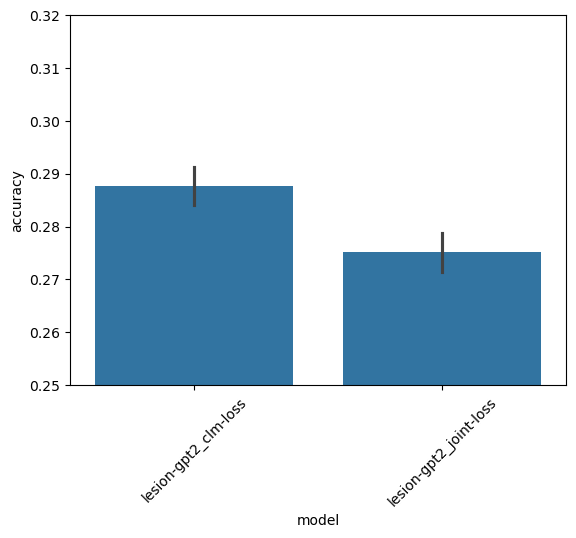

In [310]:
ax = sns.barplot(df_test, x='model', y='accuracy')

ax.tick_params(axis='x', rotation=45)
plt.ylim([0.25, 0.32])

In [226]:
models[0]

'lesion-gpt2_clm-loss'

In [227]:
models[1]

'lesion-gpt2_joint-loss'

In [225]:
var = 'accuracy'

stats.ttest_rel(dfs[0][var], dfs[1][var])

TtestResult(statistic=5.2541483054237625, pvalue=1.555903008296738e-07, df=4496)

In [248]:
df_test = df_stack[df_stack['model'].str.contains('finetune')]

models, dfs = zip(*[(model, df) for model, df in df_test.groupby('model')])

In [250]:
models

('finetune-gpt2_clm-loss',
 'finetune-gpt2_clm-loss_no-prosody-embed',
 'finetune-gpt2_joint-loss')

In [253]:
stats.ttest_rel(dfs[0][var], dfs[2][var])

TtestResult(statistic=-3.7506783872570923, pvalue=0.00017857656137664664, df=4496)

(0.25, 0.32)

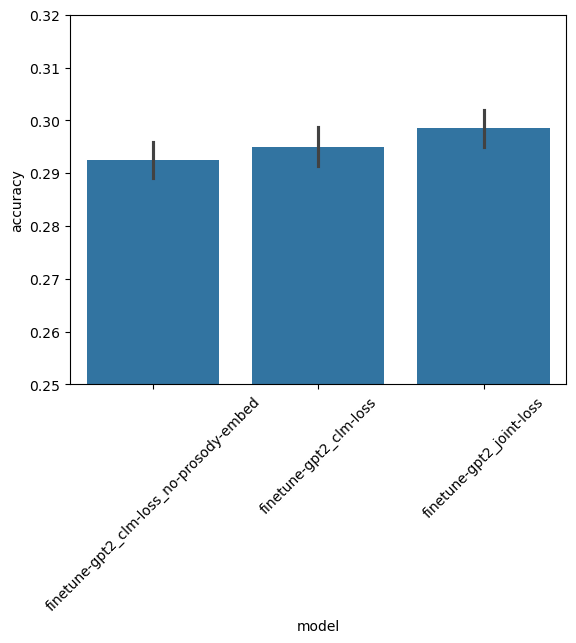